In [24]:
import numpy as np

In [25]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [96]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        self.act2 = nn.Softmax(dim=0)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        #x = self.act2(x)
        return x



guess: tensor([ 42.9474,  33.9114, -28.7722,  -5.0659,  -8.3838, -32.4616,  11.1004,
         16.5933, -12.8905,  27.0349], grad_fn=<AddBackward0>), target: tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
guess: tensor([-26.1922,  15.1068,   7.5936, -13.1802,  12.4857, -21.9086,  20.9165,
          8.6113, -22.5863,  17.5115], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
guess: tensor([ -6.2734,  33.7151,   4.7205,   4.5597,  17.7913, -35.1156,  -6.7443,
         14.3967,  -7.6081,  16.6048], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
guess: tensor([  6.7830,  32.8234,   4.3328,  -6.7356,  25.3368, -23.7889, -10.7139,
          5.9497,  -2.3961,  21.0640], grad_fn=<AddBackward0>), target: tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
guess: tensor([-30.9427,   7.3851,  19.1706,  -1.2925,  25.3121, -36.0708, -27.2819,
         28.5192,  43.9725,  13.3385], grad_fn=<AddBackward0>), target: tensor([0., 1., 0.,

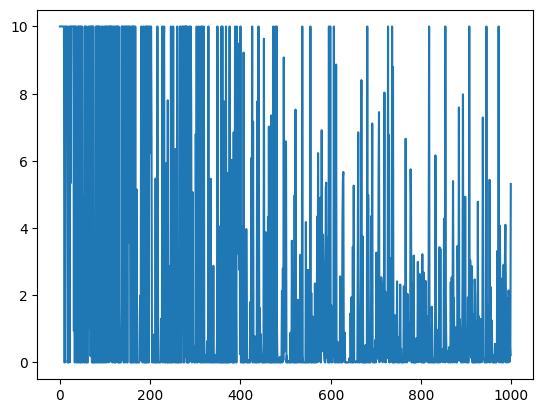

In [105]:
import torch
import math
import random
import matplotlib.pyplot as plt

model = MnistNet()

# train
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
loses = []
for i in range(1000):
    samp = math.floor(random.random()*len(X_train))
    inpt = torch.tensor(X_train[samp].reshape((-1, 28*28)[0])).float()
    target_n = torch.tensor(Y_train[samp])
    target = nn.functional.one_hot(target_n.long(), 10).float()
    optim.zero_grad()
    guess = model(inpt)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(min(loss.item(), 10))
plt.plot(loses)

In [107]:
n = 10000
corr = 0
for i in range(n):
    samp = math.floor(random.random()*len(X_test))
    X = torch.tensor(X_test[samp].reshape((-1, 28*28))).float()
    Y = Y_test[samp]
    guess = torch.argmax(model(X))
    if Y == guess: corr += 1
print(f"accuracy: {corr/n*100}%")

accuracy: 58.67%
